In [60]:
%matplotlib inline
# from memory_profiler import memory_usage
import os
import pandas as pd
from glob import glob
import numpy as np

In [61]:
from keras import layers
from keras import models
from keras.layers.advanced_activations import LeakyReLU
from keras.optimizers import Adam
import keras.backend as K
import librosa
import librosa.display
import pylab
import matplotlib.pyplot as plt
from matplotlib import figure
import gc
# from path import Path

In [62]:
import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout 
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D
from keras_preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization
from keras.models import Sequential, Model
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers, optimizers

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

import os
from glob import glob

#### First step is to create a picture from the audio file

In [63]:
data = pd.read_csv('./dataset_minor_3000.csv')

In [68]:
filename= 'C:/Users/Deepa Kapoor/Data Science/New Project/train_3000_examples/neg16kHz/0RHdUsu2qFMmG4dhpJd1NqM5ZTC2_heavy_1.wav'

In [70]:
# i = random.choice(data.filename)
ipd.Audio(filename)

Visualizing the melspectrogram 

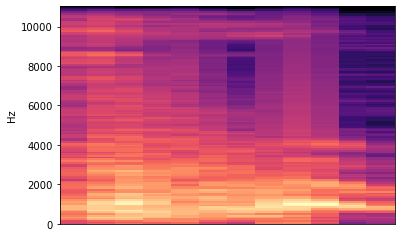

In [71]:
X, sample_rate = librosa.load(filename, sr=None, res_type='kaiser_fast')
S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
plt.show()

Using a function to generate and save the melspectrogram for each audio file

In [89]:
# Although this function was modified and many parameteres were explored with, most of it 
# came from Source 18 (sources in the READ.ME)

def images(file):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    if(file.corona_test == 'negative'):
        audiofile = os.path.join(os.path.abspath('train_3000_examples/neg16kHz')+'/'+str(file.cough_filename))
    else:
        audiofile = os.path.join(os.path.abspath('train_3000_examples/pos16kHz')+'/'+str(file.cough_filename))
    
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = file.cough_filename
    file  = 'train3000_images/' + str(name) + '.jpg'
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

In [90]:
# Although this function was modified and many parameteres were explored with, most of it 
# came from Source 18 (sources in the READ.ME)

def test_images(file):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    if(file.corona_test == 'negative'):
        audiofile = os.path.join(os.path.abspath('train_3000_examples/neg16kHz')+'/'+str(file.cough_filename))
    else:
        audiofile = os.path.join(os.path.abspath('train_3000_examples/pos16kHz')+'/'+str(file.cough_filename))
    
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = file.cough_filename
    file  = 'test3000_images/' + str(name) + '.jpg'
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

In [91]:
# Although this function was modified and many parameteres were explored with, most of it 
# came from Source 18 (sources in the READ.ME)

def val_images(file):
    
    # We define the audiofile from the rows of the dataframe when we iterate through
    # every row of our dataframe for train, val and test
    if(file.corona_test == 'negative'):
        audiofile = os.path.join(os.path.abspath('train_3000_examples/neg16kHz')+'/'+str(file.cough_filename))
    else:
        audiofile = os.path.join(os.path.abspath('train_3000_examples/pos16kHz')+'/'+str(file.cough_filename))
    
    
    # Loading the image with no sample rate to use the original sample rate and
    # kaiser_fast to make the speed faster according to a blog post about it (on references)
    X, sample_rate = librosa.load(audiofile, sr=None, res_type='kaiser_fast')
   
    # Setting the size of the image
    fig = plt.figure(figsize=[1,1])
    
    # This is to get rid of the axes and only get the picture 
    ax = fig.add_subplot(111)
    ax.axes.get_xaxis().set_visible(False)
    ax.axes.get_yaxis().set_visible(False)
    ax.set_frame_on(False)
    
    # This is the melspectrogram from the decibels with a linear relationship
    S = librosa.feature.melspectrogram(y=X, sr=sample_rate)
    librosa.display.specshow(librosa.power_to_db(S, ref=np.max), y_axis='linear')
    
    # Here we choose the path and the name to save the file, we will change the path when
    # using the function for train, val and test to make the function easy to use and output
    # the images in different folders to use later with a generator
    name = file.cough_filename
    file  = 'val3000_images/' + str(name) + '.jpg'
    
    # Here we finally save the image file choosing the resolution 
    plt.savefig(file, dpi=500, bbox_inches='tight',pad_inches=0)
    
    # Here we close the image because otherwise we get a warning saying that the image stays
    # open and consumes memory
    plt.close()

Now we load the dataframe and slice the data into train, validation and testing data like before. Again, 3435 for training, 1000 for validation and 1000 for testing.

In [92]:
data = pd.read_csv('./dataset_minor_3000.csv')

In [93]:
data.head()

,corona_test,cough_filename
0,negative,01OCEf1yB4czsq8ygRoT51s96Ba2_heavy_1.wav
1,negative,01OCEf1yB4czsq8ygRoT51s96Ba2_heavy_2.wav
2,negative,01OCEf1yB4czsq8ygRoT51s96Ba2_shallow_1.wav
3,negative,01OCEf1yB4czsq8ygRoT51s96Ba2_shallow_3.wav
4,negative,0c00ybTdnIRUTXeg20bZjJOzhKv1_heavy_1.wav


In [94]:
# train = data[:300] 
# val = data[301:351] + data[475:525]
# test = data[352:402] + data[424:474]
X_train,X_test,Y_train,Y_test = train_test_split(data['corona_test'],data['cough_filename'],test_size=0.2,random_state=0)

We use the function to create all the images from train, val and test

In [95]:
X_train.head()

2370    positive
1774    positive
731     negative
271     negative
1077    negative
Name: corona_test, dtype: object

In [96]:
Y_train.head()

2370                           wavegan_pos_486.wav
1774    s1x2Ze9iVZNf6oFZDAZ4S9x3Cky2_shallow_1.wav
731                            wavegan_neg_356.wav
271     Sy1VK1UgX0ZMcMJitgPal1sp8jj2_shallow_2.wav
1077                           wavegan_neg_668.wav
Name: cough_filename, dtype: object

In [97]:
frames= [X_train,Y_train]
train=pd.concat(frames,axis=1)

In [98]:
train.tail()

,corona_test,cough_filename
763,negative,wavegan_neg_385.wav
835,negative,wavegan_neg_45.wav
1653,positive,IFMid2LmeCTSQAFaL8wTSUg20No2_shallow_1.wav
2607,positive,wavegan_pos_7.wav
2732,positive,wavegan_pos_811.wav


In [99]:
X_test1,X_val,Y_test1,Y_val = train_test_split(X_test,Y_test,test_size=0.5,random_state=0)

In [100]:
frames2= [X_test1,Y_test1]
test=pd.concat(frames2,axis=1)

In [101]:
test.head()

,corona_test,cough_filename
2272,positive,wavegan_pos_398.wav
2624,positive,wavegan_pos_714.wav
485,negative,wavegan_neg_134.wav
1334,negative,wavegan_neg_9.wav
2906,positive,wavegan_pos_969.wav


In [102]:
frames3= [X_val,Y_val]
val=pd.concat(frames3,axis=1)

In [103]:
val.head()

,corona_test,cough_filename
890,negative,wavegan_neg_5.wav
2229,positive,wavegan_pos_359.wav
2350,positive,wavegan_pos_468.wav
1695,positive,nC130uADRFZF5vae8qZt2qmpbpi1_shallow_3.wav
1465,negative,XzIjEtRHHPci6Zq0zb9Lx0d6zEr2_shallow_5.wav


In [104]:
train.apply(images, axis=1);

C:\Users\Deepa Kapoor\anaconda364\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1904
  warnings.warn(
C:\Users\Deepa Kapoor\anaconda364\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=384
  warnings.warn(
C:\Users\Deepa Kapoor\anaconda364\lib\site-packages\librosa\core\spectrum.py:222: UserWarning: n_fft=2048 is too small for input signal of length=1664
  warnings.warn(


In [105]:
test.apply(test_images, axis=1);

In [106]:
val.apply(val_images, axis=1);

In [107]:
plt.close('all')

In [108]:
os.system('say -v Juan ya acabé');

We will use the datagen.flow_from_dataframe from the keras documentation to use with the CNN
https://keras.io/preprocessing/image/

![keras](img/keras.jpg)

In [109]:
data = pd.read_csv('dataset_minor_3000.csv',dtype=str)

In [110]:
# train = data[:3435]
# val = data[3435:4435]
# test = data[4435:]

In [111]:
# Function to change the file names to the image names to use them later 
def make_jpg(files):
    return str(files)+'.jpg'

In [112]:
train['cough_filename'] = train["cough_filename"].apply(make_jpg)

In [113]:
val['cough_filename'] = val["cough_filename"].apply(make_jpg)

In [114]:
test['cough_filename'] = test["cough_filename"].apply(make_jpg)

In [115]:
# Rescaling the images as usual to feed into the CNN
datagen=ImageDataGenerator(rescale=1./255.)
# datagen=ImageDataGenerator(rescale = 1./255,
#                                    shear_range = 0.2,
#                                    zoom_range = 0.2,
#                                    horizontal_flip = True,
#                                    width_shift_range=0.2,
#                                    height_shift_range=0.2,
#                                    rotation_range=15,
#                                    vertical_flip=True,
#                                    fill_mode='reflect',
#                                    data_format='channels_last',
#                                    brightness_range=[0.5, 1.5],
#                                    featurewise_center=True,
#                                    featurewise_std_normalization=True)


In [116]:
train.head()

,corona_test,cough_filename
2370,positive,wavegan_pos_486.wav.jpg
1774,positive,s1x2Ze9iVZNf6oFZDAZ4S9x3Cky2_shallow_1.wav.jpg
731,negative,wavegan_neg_356.wav.jpg
271,negative,Sy1VK1UgX0ZMcMJitgPal1sp8jj2_shallow_2.wav.jpg
1077,negative,wavegan_neg_668.wav.jpg


In [117]:
train.groupby('corona_test').count()

,cough_filename
corona_test,
negative,1157
positive,1243


In [119]:
train_generator=datagen.flow_from_dataframe(
    dataframe=train,
    directory="train3000_images",
    x_col="cough_filename",
    y_col="corona_test",
    batch_size=16,
    shuffle=False,
    class_mode="binary",
    target_size=(64,64))

Found 2400 validated image filenames belonging to 2 classes.


In [120]:
for x,y in train_generator:
  print(x.shape)
  print(y.shape)
  break

(16, 64, 64, 3)
(16,)


In [121]:
val_generator=datagen.flow_from_dataframe(
    dataframe=val,
    directory="val3000_images",
    x_col="cough_filename",
    y_col="corona_test",
    batch_size=16,
    shuffle=False,
    class_mode="binary",
    target_size=(64,64))

Found 300 validated image filenames belonging to 2 classes.


In [122]:
test_generator=datagen.flow_from_dataframe(
    dataframe=test,
    directory="test3000_images",
    x_col="cough_filename",
    y_col="corona_test",
    batch_size=16,
    shuffle=False,
    class_mode="binary",
    target_size=(64,64))

Found 300 validated image filenames belonging to 2 classes.


In [123]:
plt.close('all')

In [124]:
# import os
os.system('say -v Juan ya acabé');

In [ ]:
### Now we finally can build the CNN model and fit it

In [ ]:
## Pretrained Models

In [ ]:
### EfficentNet by Google

In [43]:
# import efficientnet.keras as efn
# base_model = efn.EfficientNetB0(input_shape = (64,64, 3), include_top = False, weights = 'imagenet')

# for layer in base_model.layers:
#     layer.trainable = False
    
# x = model.output
# x = Flatten()(x)
# x = Dense(1024, activation="relu")(x)
# x = Dropout(0.5)(x)
# predictions = Dense(1, activation="sigmoid")(x)
# model_final = Model(model.input, predictions)

# model_final.compile(optimizers.RMSprop(lr=0.0001, decay=1e-6),loss='binary_crossentropy',metrics=['accuracy'])

# eff_history = model_final.fit_generator(train_generator, validation_data = test_generator, steps_per_epoch =6 , epochs = 30)

In [ ]:
### ResNet50

In [44]:
# ## Resnet 50
# import tensorflow as tf
# from tensorflow.keras.applications import ResNet50

# base_model = ResNet50(input_shape=(64,64,3), include_top=False, weights="imagenet")

# for layer in base_model.layers:
#     layer.trainable = False
    
# from tensorflow.keras.applications import ResNet50
# from tensorflow.python.keras.models import Sequential
# from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

# base_model = Sequential()
# base_model.add(ResNet50(include_top=False, weights='imagenet', pooling='max'))
# base_model.add(Dense(1, activation='sigmoid'))


# base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

# resnet_history = base_model.fit(train_generator, validation_data = test_generator, steps_per_epoch = 6, epochs = 10)


In [ ]:
### VGG16

In [129]:
## VGG16
# Accuracy - train- 70 and test - 60
import tensorflow as tf
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (64,64, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])


In [ ]:
### Basic CNN Model

In [46]:
# # Basic CNN Model with Accuracy -: Test- 60 and Train- 90
# # Building our model 
# model = Sequential()

# model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.5))

# # model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
# # model.add(MaxPooling2D(pool_size=(2, 2)))
# # model.add(Dropout(0.5))

# model.add(Flatten())
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.5))

# model.add(Dense(1, activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#                   optimizer='adam',
#                   metrics=['accuracy'])

# history = model.fit(x=train_generator,
#                     steps_per_epoch=6,
#                     validation_data=test_generator,
#                     validation_steps=1,
#                     epochs=10)


In [ ]:
### AlexNet

In [47]:
# #Alexnet 

# model = Sequential()

# # 1st Convolutional Layer
# model.add(Conv2D(filters=32, input_shape=(64,64,3), kernel_size=(11,11), strides=(4,4), padding="valid"))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# # 2nd Convolutional Layer
# model.add(Conv2D(filters=64, kernel_size=(2,2), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))

# # 3rd Convolutional Layer
# model.add(Conv2D(filters=64, kernel_size=(1,1), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))

# # 4th Convolutional Layer
# model.add(Conv2D(filters=128, kernel_size=(1,1), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))

# # 5th Convolutional Layer
# model.add(Conv2D(filters=256, kernel_size=(3,3), strides=(1,1), padding='valid'))
# model.add(Activation('relu'))
# # Max Pooling
# model.add(MaxPooling2D(pool_size=(1,1), strides=(2,2), padding='valid'))

# # Passing it to a Fully Connected layer
# model.add(Flatten())
# # 1st Fully Connected Layer
# model.add(Dense(200, input_shape=(64,64,3,)))
# model.add(Activation('relu'))
# # Add Dropout to prevent overfitting
# model.add(Dropout(0.25))

# # 2nd Fully Connected Layer
# model.add(Dense(100))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.2))

# # 3rd Fully Connected Layer
# model.add(Dense(50))
# model.add(Activation('relu'))
# # Add Dropout
# model.add(Dropout(0.1))

# # Output Layer
# model.add(Dense(2))
# model.add(Activation('softmax'))

# model.compile(loss='categorical_crossentropy',
#                   optimizer='adam',
#                   metrics=['accuracy'])
## Accuracy- Major Over Fitting -:  training -90 and test - 54
# history = model.fit(x=train_generator,
#                     steps_per_epoch=10,
#                     validation_data=test_generator,
#                     validation_steps=5,
#                     epochs=40)

In [48]:
# Compiling using adam and categorical crossentropy
# model.compile(loss='categorical_crossentropy',
#                   optimizer='adam',
#                   metrics=['accuracy'])

In [141]:
# Fitting our CNN with 250 epochs and setting the results to history for visuals
# history = model.fit(x=train_generator,
#                     steps_per_epoch=8,
#                     validation_data=test_generator,
#                     validation_steps=4,
#                     epochs=50)
vgghist = model.fit(train_generator, validation_data = val_generator, steps_per_epoch = 40, epochs = 5)

Epoch 1/5
40/40 [==============================] - 70s 2s/step - loss: 0.4706 - acc: 0.7734 - val_loss: 0.5331 - val_acc: 0.7100
Epoch 2/5
40/40 [==============================] - 66s 2s/step - loss: 0.4725 - acc: 0.7719 - val_loss: 0.5512 - val_acc: 0.6867
Epoch 3/5
40/40 [==============================] - 67s 2s/step - loss: 0.4784 - acc: 0.7609 - val_loss: 0.5471 - val_acc: 0.6900
Epoch 4/5
40/40 [==============================] - 68s 2s/step - loss: 0.4742 - acc: 0.7719 - val_loss: 0.6000 - val_acc: 0.6433
Epoch 5/5
40/40 [==============================] - 68s 2s/step - loss: 0.4581 - acc: 0.7688 - val_loss: 0.5437 - val_acc: 0.6867


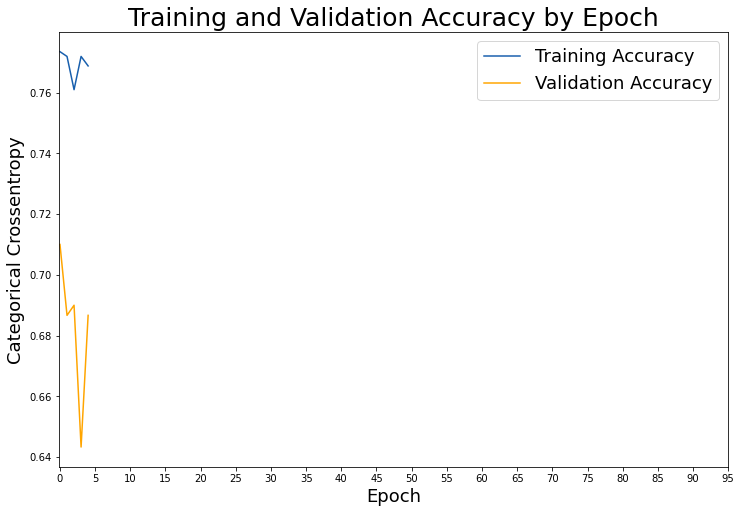

In [142]:
# Check out our train accuracy and validation accuracy over epochs.
# train_accuracy = history.history['accuracy']
# val_accuracy = history.history['val_accuracy']
train_accuracy = vgghist.history['acc']
val_accuracy = vgghist.history['val_acc']
# train_accuracy = resnet_history.history['acc']
# val_accuracy = resnet_history.history['val_acc']
# Set figure size.
plt.figure(figsize=(12, 8))

# Generate line plot of training, testing loss over epochs.
plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')

# Set title
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18)
plt.show();

In [139]:
test.head()

,corona_test,cough_filename
2272,positive,wavegan_pos_398.wav.jpg
2624,positive,wavegan_pos_714.wav.jpg
485,negative,wavegan_neg_134.wav.jpg
1334,negative,wavegan_neg_9.wav.jpg
2906,positive,wavegan_pos_969.wav.jpg


In [143]:
# Generating a new test dataframe that includes the labels for comparison and 
# checking the accuracy of our model with this never before seen data
# test = data[4435:]

# Generating predictions on our never seen data with the model we built
preds = model.predict(val_generator)

# Creating an empty list to store the values where the predictions are the maximum out 
# of all the 10 possible values
p = []
for i in range(0, len(preds)):
    p.append(np.where(preds[i] == max(preds[i])))

# Creating an empty list to store the values in a clean list
predictions = []
for i in range(0, len(preds)):
    predictions.append(p[i][0][0])
    
# Adding those predictions to our test dataframe
val['predictions'] = predictions

# Changing the numeric values to their corresponding labels
val['predictions'] = val['predictions'].map({ 0:'negative',1:'positive'})

# Checking the percentage of correct predictions 
round(len(val[val['corona_test'] == val['predictions']])/len(val),2)

0.56

In [55]:
# Generating a new test dataframe that includes the labels for comparison and 
# checking the accuracy of our model with this never before seen data
# test = data[4435:]

# Generating predictions on our never seen data with the model we built
preds = model.predict(train_generator)

# Creating an empty list to store the values where the predictions are the maximum out 
# of all the 10 possible values
p = []
for i in range(0, len(preds)):
    p.append(np.where(preds[i] == max(preds[i])))

# Creating an empty list to store the values in a clean list
predictions = []
for i in range(0, len(preds)):
    predictions.append(p[i][0][0])
    
# Adding those predictions to our test dataframe
train['predictions'] = predictions

# Changing the numeric values to their corresponding labels
train['predictions'] = train['predictions'].map({ 0:'negative',1:'positive'})

# Checking the percentage of correct predictions 
round(len(train[train['corona_test'] == train['predictions']])/len(train),2)

0.59

In [56]:
# Generating a new test dataframe that includes the labels for comparison and 
# checking the accuracy of our model with this never before seen data
# test = data[4435:]

# Generating predictions on our never seen data with the model we built
preds = model.predict(test_generator)

# Creating an empty list to store the values where the predictions are the maximum out 
# of all the 10 possible values
p = []
for i in range(0, len(preds)):
    p.append(np.where(preds[i] == max(preds[i])))

# Creating an empty list to store the values in a clean list
predictions = []
for i in range(0, len(preds)):
    predictions.append(p[i][0][0])
    
# Adding those predictions to our test dataframe
test['predictions'] = predictions

# Changing the numeric values to their corresponding labels
test['predictions'] = test['predictions'].map({ 0:'negative',1:'positive'})

# Checking the percentage of correct predictions 
round(len(test[test['corona_test'] == test['predictions']])/len(test),2)

0.67

In [59]:
score = model.evaluate(train["cough_filename"], train["corona_test"], verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(test["cough_filename"], test["corona_test"], verbose=0)
print("Testing Accuracy: ", score[1])

ValueError: in user code:

    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1233 test_function  *
        return step_function(self, iterator)
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1224 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1217 run_step  **
        outputs = model.test_step(data)
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\training.py:1183 test_step
        y_pred = self(x, training=False)
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\base_layer.py:998 __call__
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    C:\Users\Deepa Kapoor\AppData\Roaming\Python\Python38\site-packages\tensorflow\python\keras\engine\input_spec.py:234 assert_input_compatibility
        raise ValueError('Input ' + str(input_index) + ' of layer ' +

    ValueError: Input 0 of layer block1_conv1 is incompatible with the layer: : expected min_ndim=4, found ndim=2. Full shape received: (32, 1)


### We got 62% accuracy on our test data

In [53]:
# Saving the dataframe to use with our Dense NN to use as a voting classifier 
predic_cnn = pd.DataFrame(preds)

predic_cnn.to_csv('predict_cnn.csv', index=False)

In [54]:
os.system('say -v Juan ya acabé');